In [2]:
library(ggplot2)
library(gridExtra)
library(MASS)
library(corrplot)
knitr::opts_chunk$set(echo = TRUE)

### Importation des données

In [3]:
# 37,375 rows
X_train <- read.csv("~/Bureau/4GMM/Projet/GestionDeProjet4A/Données/X_train_v2.csv")
Y_train <- read.csv("~/Bureau/4GMM/Projet/GestionDeProjet4A/Données/Y_train_sl9m6Jh.csv")

# 36,529 rows
X_test <- read.csv("~/Bureau/4GMM/Projet/GestionDeProjet4A/Données/X_test_v2.csv")
Y_test_random <- read.csv("~/Bureau/4GMM/Projet/GestionDeProjet4A/Données/Y_test_random.csv")

### Première visualisation de la production d'énergie (Y)

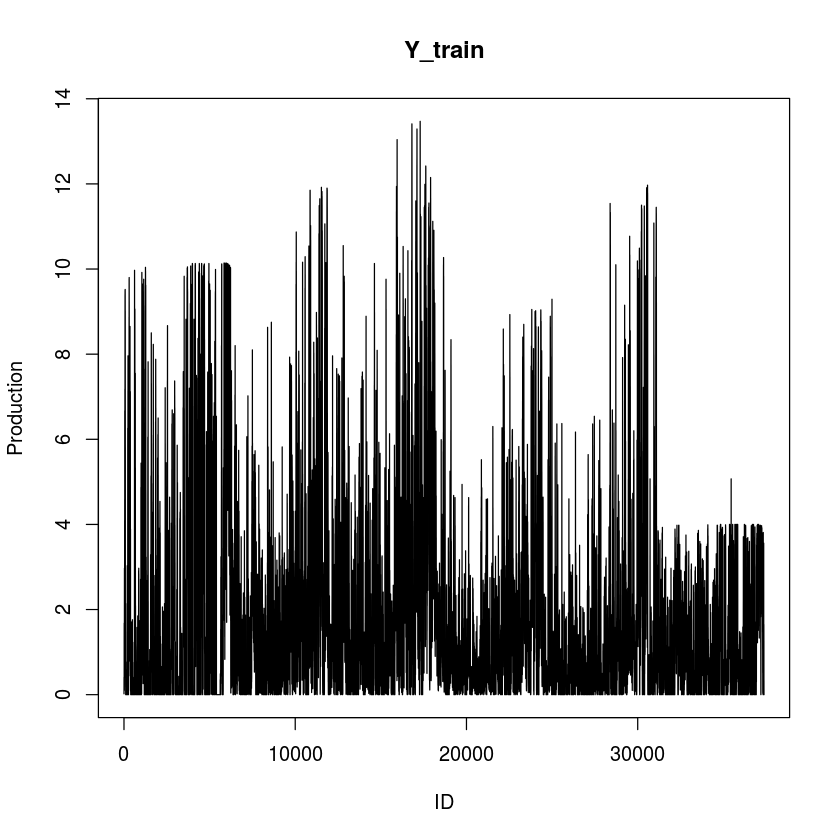

In [4]:
plot(Y_train, type="l", main = "Y_train")

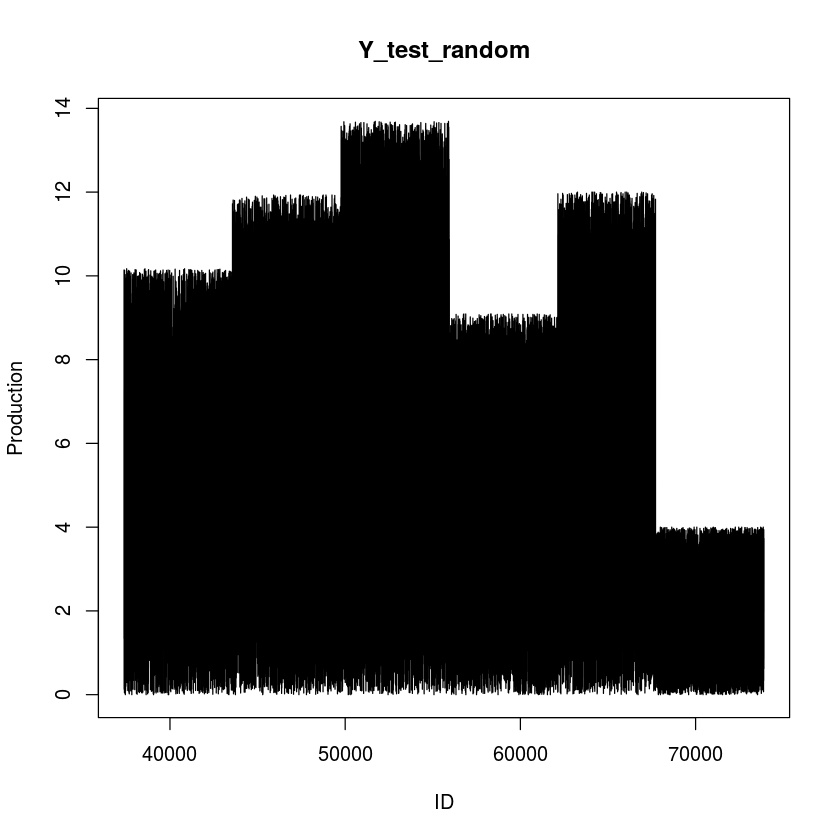

In [5]:
plot(Y_test_random, type="l", main = "Y_test_random")

### Données disponibles

In [ ]:
subsetL <- 25:192   # WF1 - Week 1
subsetC <- 16:18    # NWP1 - Yesterday 00h - U,V,T

In [26]:
data1 <- X_train[subsetL, subsetC]
data2 <- cbind(Y_train[subsetL, -1], data1)
names(data2) = c("Y","U","V","T")
summary(data2)

       Y               U                 V                  T        
 Min.   :0.000   Min.   :-4.2779   Min.   :-18.1620   Min.   :285.4  
 1st Qu.:0.000   1st Qu.: 0.7129   1st Qu.: -9.9222   1st Qu.:289.6  
 Median :0.425   Median : 2.7736   Median : -1.3761   Median :290.6  
 Mean   :2.123   Mean   : 2.4519   Mean   : -4.6516   Mean   :290.8  
 3rd Qu.:3.030   3rd Qu.: 4.1511   3rd Qu.:  0.4196   3rd Qu.:292.1  
 Max.   :9.520   Max.   : 7.8795   Max.   :  7.5283   Max.   :294.6  

**Vent**

In [27]:
subsetVent <- c("Y","U","V")
data3 <- data2[ , subsetVent]

In [28]:
data3$F <- sqrt(data3$U^2 + data3$V^2)
summary(data3)

       Y               U                 V                  F          
 Min.   :0.000   Min.   :-4.2779   Min.   :-18.1620   Min.   : 0.6364  
 1st Qu.:0.000   1st Qu.: 0.7129   1st Qu.: -9.9222   1st Qu.: 3.0256  
 Median :0.425   Median : 2.7736   Median : -1.3761   Median : 5.5842  
 Mean   :2.123   Mean   : 2.4519   Mean   : -4.6516   Mean   : 7.3500  
 3rd Qu.:3.030   3rd Qu.: 4.1511   3rd Qu.:  0.4196   3rd Qu.:10.3710  
 Max.   :9.520   Max.   : 7.8795   Max.   :  7.5283   Max.   :18.7067  

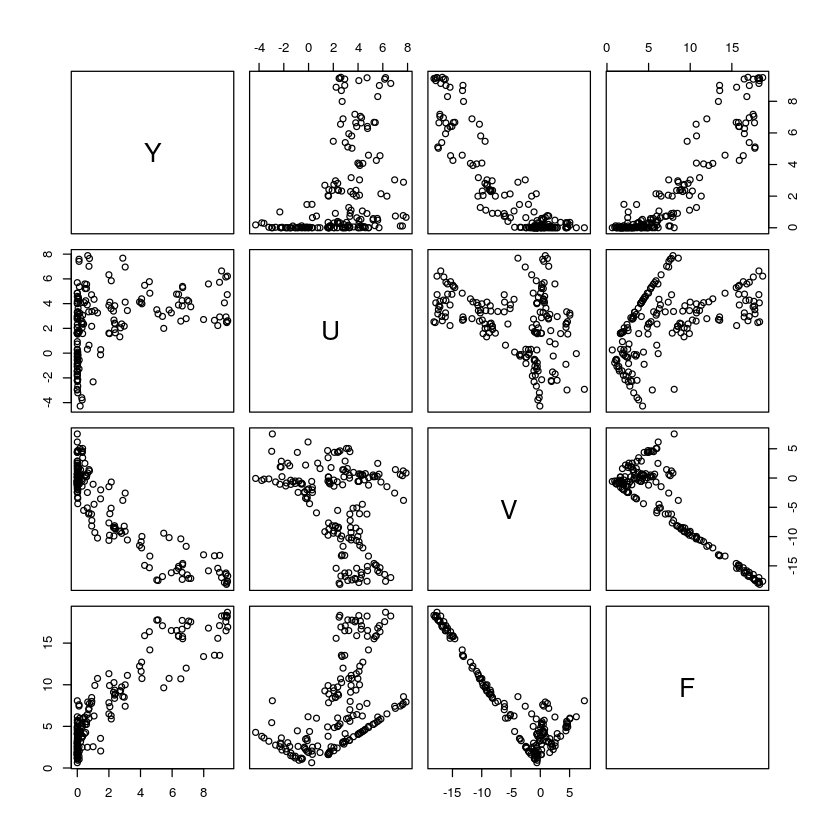

In [31]:
pairs(data3)

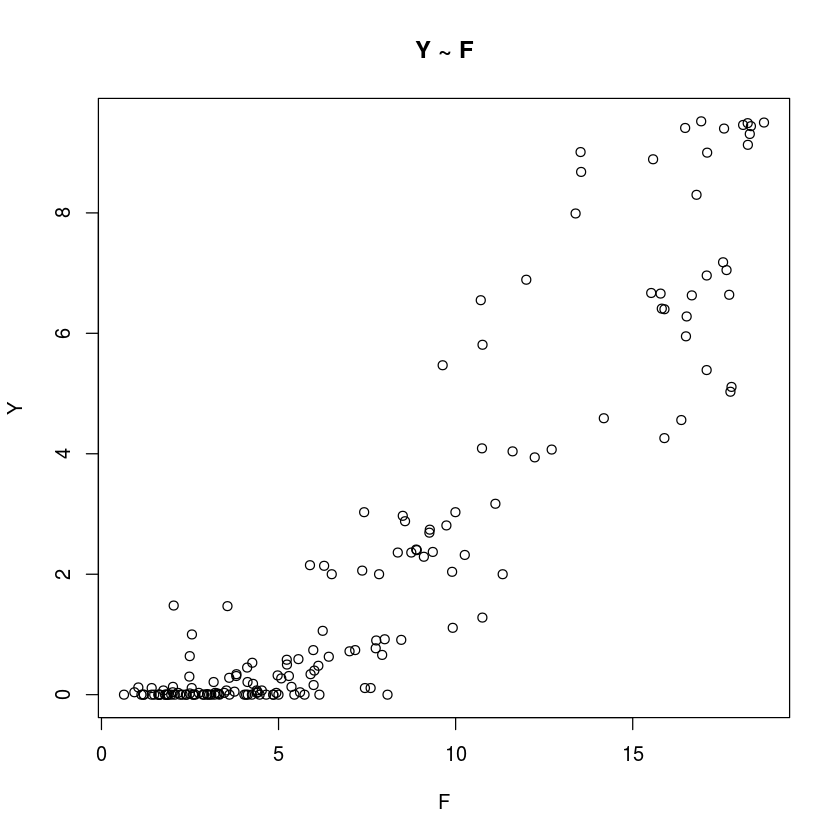

In [38]:
with(data = data3, plot(Y ~ F, main = "Y ~ F"))

In [52]:
#summary(lm(Y ~ V-1, data = data3))          R² = 0.8629
#summary(lm(Y ~ F-1, data = data3))          R² = 0.8231
#summary(lm(Y ~ I(V^2)-1, data = data3))     R² = 0.9087
summary(lm(Y ~ I(F^2)-1, data = data3))    # R² = 0.9122 


Call:
lm(formula = Y ~ I(F^2) - 1, data = data3)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3001 -0.4861 -0.1472  0.1672  4.1762 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
I(F^2) 0.0264141  0.0006319    41.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.083 on 167 degrees of freedom
Multiple R-squared:  0.9128,	Adjusted R-squared:  0.9122 
F-statistic:  1747 on 1 and 167 DF,  p-value: < 2.2e-16


**Température**

In [63]:
subsetTemp <- c("Y","T")
data4 <- data2[ , subsetTemp]
nblignes <- nrow(data4)

In [67]:
data4$GT <- c(0,abs(data4[2:nblignes,"T"]-data4[1:nblignes-1,"T"])/data4[2:nblignes,"T"])
summary(data4)

       Y               T               GT           
 Min.   :0.000   Min.   :285.4   Min.   :0.0000000  
 1st Qu.:0.000   1st Qu.:289.6   1st Qu.:0.0005166  
 Median :0.425   Median :290.6   Median :0.0011703  
 Mean   :2.123   Mean   :290.8   Mean   :0.0014821  
 3rd Qu.:3.030   3rd Qu.:292.1   3rd Qu.:0.0021495  
 Max.   :9.520   Max.   :294.6   Max.   :0.0059466  

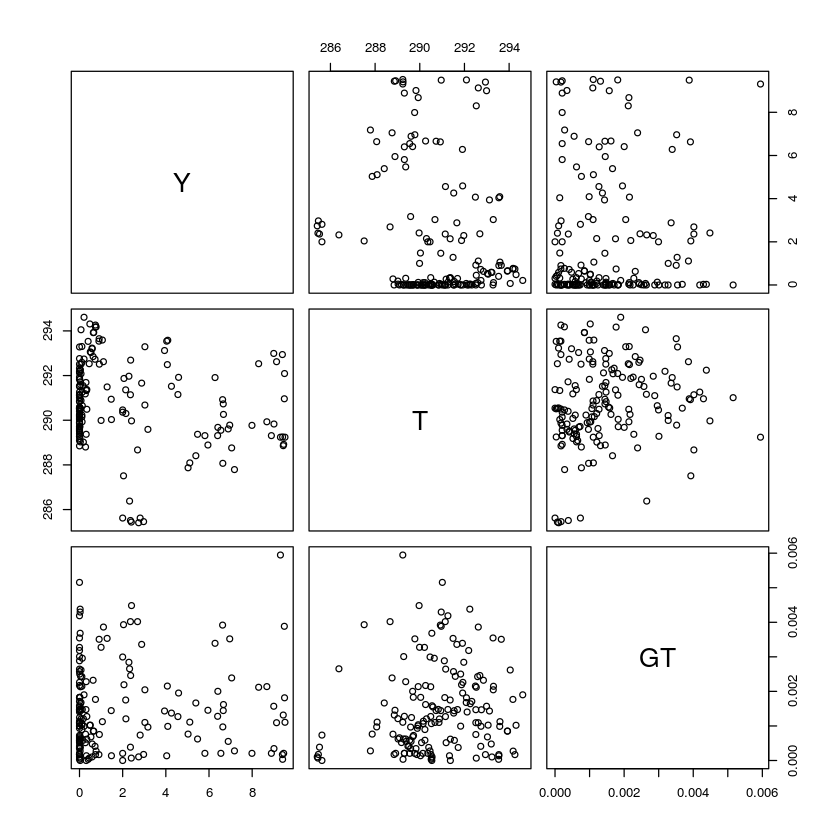

In [68]:
pairs(data4)